### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
df_data = pd.read_csv("Data.csv")
df_data.head(5)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
df_item = pd.read_csv("item.csv")
df_item.head(5)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df_user = pd.read_csv("user.csv");
df_user.head(5)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [5]:
print("Information of Movie Rating Data:")
print("")
print("Shape :"+str(df_data.shape))
print("")
print("Info :"+str(df_data.info()))
print("")
print("Describe: "+str(df_data.describe()))
df_data.isna().sum()

Information of Movie Rating Data:

Shape :(100000, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
Info :None

Describe:             user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.00

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [6]:
print("Information About Movi")
print("Shape :"+str(df_item.shape))
print("")
print("Info :"+str(df_item.info()))
print("")
print("Describe: "+str(df_item.describe()))
df_item.isna().sum()

Information About Movi
Shape :(1681, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [7]:
print("Information About User")
print("Shape :"+str(df_user.shape))
print("")
print("Info :"+str(df_user.info()))
print("")
print("Describe: "+str(df_user.describe()))
df_user.isna().sum()

Information About User
Shape :(943, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
Info :None

Describe:           user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000


user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [8]:
# use sum on the default axis
genere_list = ["Action","Adventure","Animation","Childrens","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]
#df_item[genere_list].sum(axis=0)
df_item[genere_list].sum(axis=0)

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [9]:
#hint: use sum on the axis = 1
df_item[df_item[genere_list].sum(axis=1)>1].head(10)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III,22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,11,Seven (Se7en),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
11,12,"Usual Suspects, The",14-Aug-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
13,14,"Postino, Il",01-Jan-1994,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [10]:
df_item=df_item[df_item["unknown"]==0]

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [11]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

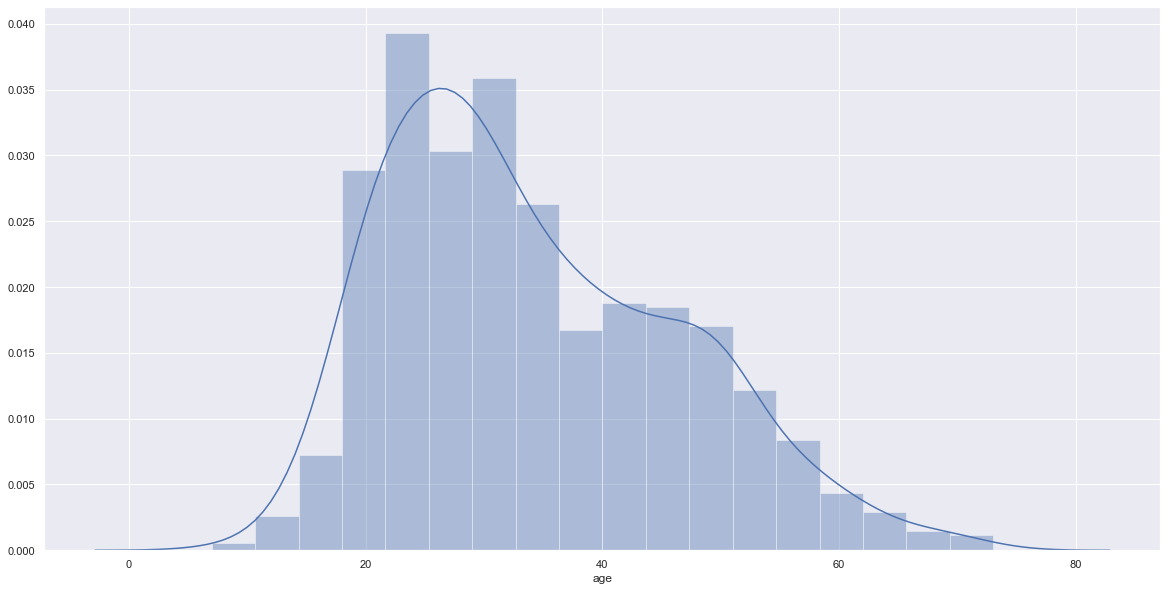

In [12]:
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(df_user["age"])

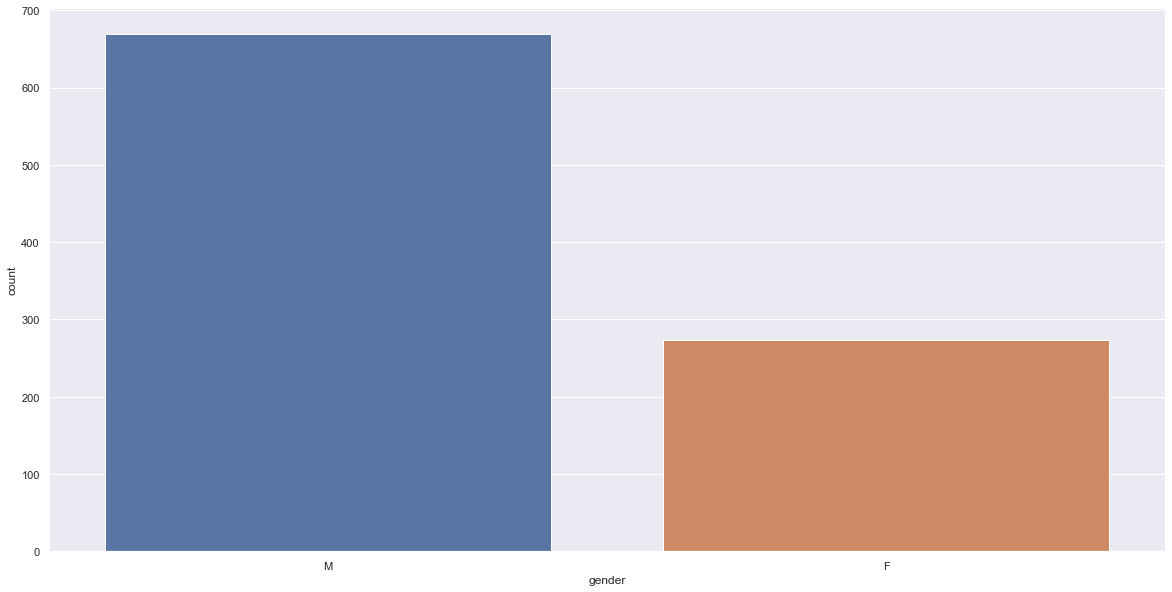

In [13]:
sns.countplot(x="gender", data=df_user)

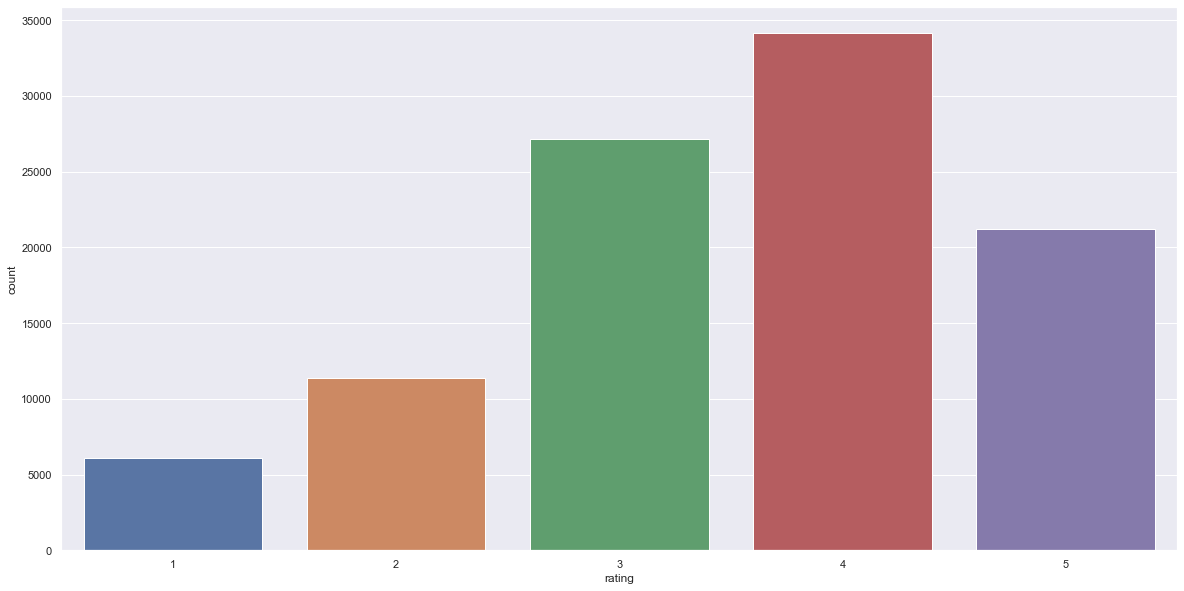

In [14]:
sns.countplot(x="rating", data=df_data)

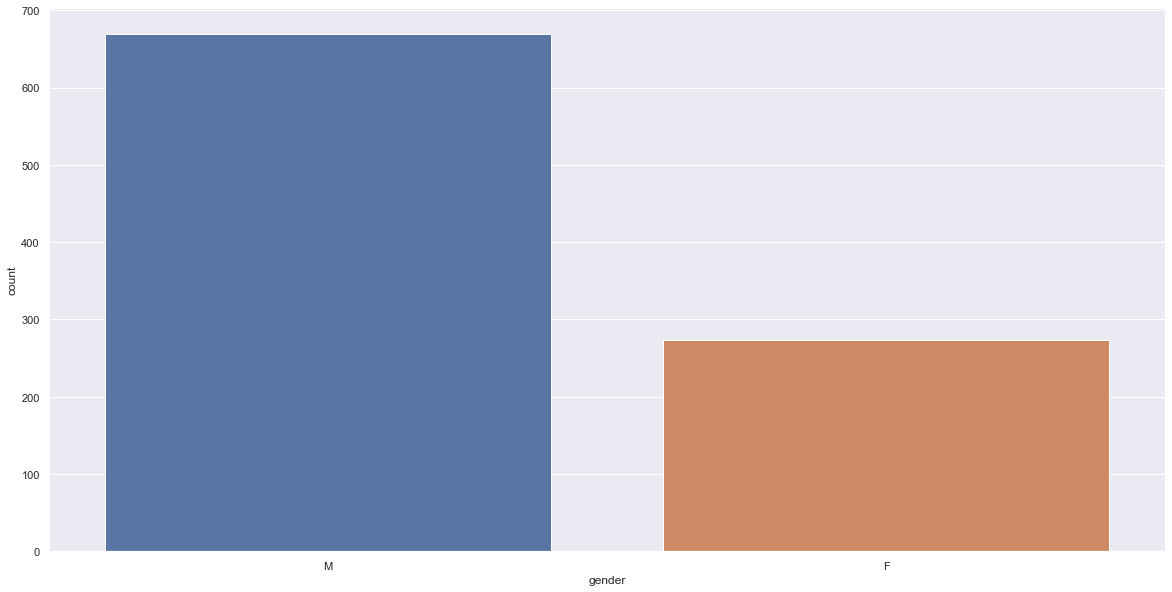

In [15]:
sns.countplot(x="gender", data=df_user)

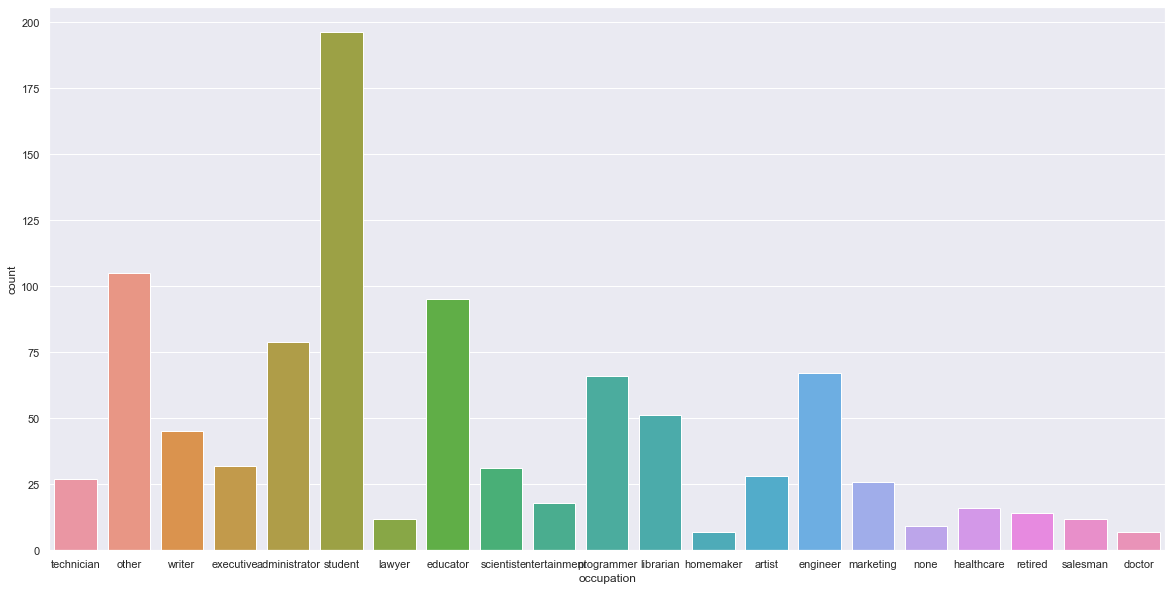

In [16]:
sns.countplot(x="occupation", data=df_user)

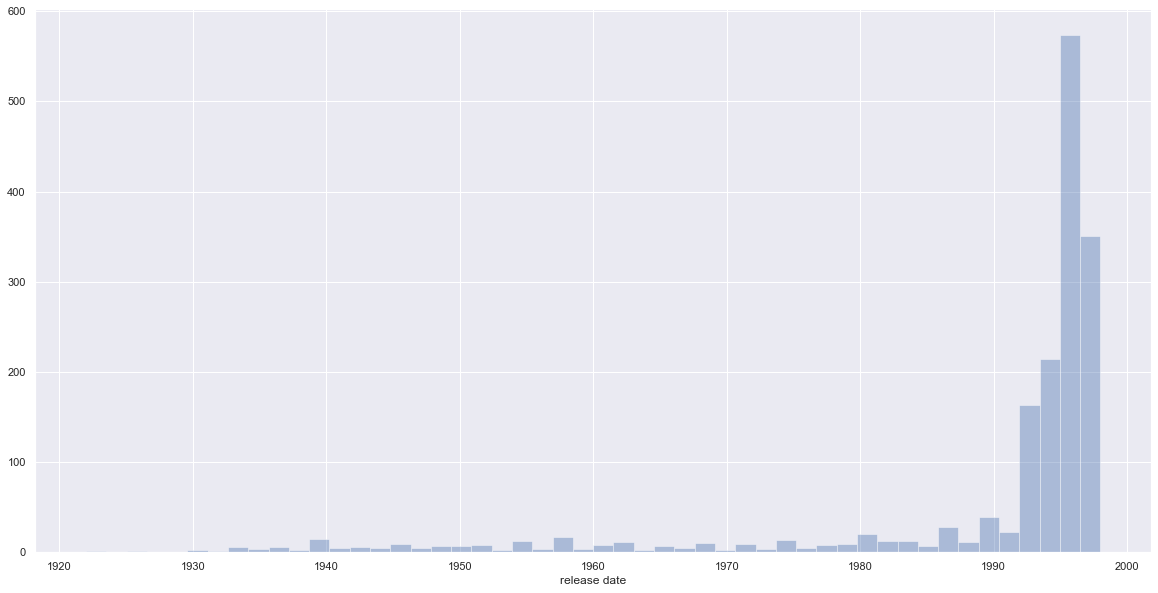

In [17]:
sns.distplot(pd.to_datetime(df_item["release date"]).dt.year, kde=False)

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [19]:
#your answers here

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [20]:
#Your answer here
df_item.head(4)
df_genere_popularity = df_item[genere_list]
df_genere_popularity["release_year"]=pd.to_datetime(df_item["release date"]).dt.year

C:\Users\LAB2MKS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
df_genere_popularity=df_genere_popularity.groupby("release_year").sum()

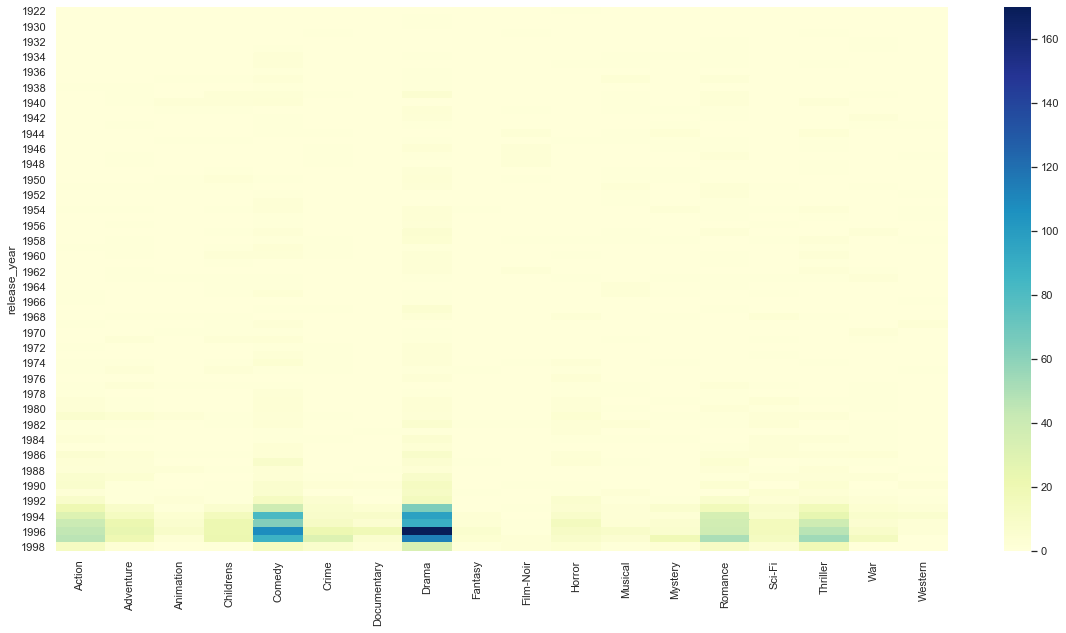

In [22]:
sns.heatmap(df_genere_popularity, cmap="YlGnBu")

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [23]:
#your answer here
df_movie_rating=df_data.groupby("movie id", as_index=False)["rating"].count()

In [24]:
df_movie_rating.head(10)

,movie id,rating
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
5,6,26
6,7,392
7,8,219
8,9,299
9,10,89


In [25]:
df_movie_rating.columns = ['movi_id', 'total_rating']

In [26]:
df_movie_rating_100=df_movie_rating[df_movie_rating["total_rating"]>100]

In [27]:
df_final_rating = df_data[df_data["movie id"].isin(df_movie_rating_100['movi_id'])]

pd_merge_data = pd.merge(df_item, df_final_rating, how='inner',on='movie id')

In [28]:
df_top_25=pd_merge_data[['movie id', 'movie title','rating']].groupby(["movie id", "movie title"], as_index=False)["rating"].mean().sort_values(by='rating', ascending=False).head(n=25)

In [29]:
df_top_25=df_top_25.reset_index().drop(columns=['index'])

In [30]:
df_top_25

,movie id,movie title,rating
0,408,"Close Shave, A",4.491071
1,318,Schindler's List,4.466443
2,169,"Wrong Trousers, The",4.466102
3,483,Casablanca,4.456790
4,64,"Shawshank Redemption, The",4.445230
5,603,Rear Window,4.387560
6,12,"Usual Suspects, The",4.385768
7,50,Star Wars,4.358491
8,178,12 Angry Men,4.344000
9,134,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [31]:
df_movi_list= df_item[(df_item["Drama"]==1) | (df_item["Sci-Fi"]==1) | (df_item["Romance"]==1)]

In [32]:
df_user_rating = pd.merge(df_user, df_data, how='inner',on='user id')

In [33]:
df_user_movie_rating = df_user_rating[["user id","gender","rating","movie id"]]

In [34]:
df_men_women = pd.merge(df_user_movie_rating, df_movi_list, how='inner',on='movie id')

In [35]:
df_final_data = df_men_women[["gender","rating","Drama","Sci-Fi","Romance"]]

In [36]:
df_drama_rating=df_final_data[df_final_data["Drama"]==1].groupby(["Drama","gender"], sort=False).agg({'rating': 'sum'})
df_drama_total=df_final_data[df_final_data["Drama"]==1].groupby(["Drama"], sort=False).agg({'rating': 'sum'})
df_drama_rating.div(df_drama_total, level='Drama')

rating
Drama gender          
1     M       0.725956
      F       0.274044

In [37]:
#True Men watch more drama than women    

In [38]:
df_drama_rating=df_final_data[df_final_data["Sci-Fi"]==1].groupby(["Sci-Fi","gender"], sort=False).agg({'rating': 'sum'})
df_drama_total=df_final_data[df_final_data["Sci-Fi"]==1].groupby(["Sci-Fi"], sort=False).agg({'rating': 'sum'})
df_drama_rating.div(df_drama_total, level='Sci-Fi')

rating
Sci-Fi gender          
1      M       0.797123
       F       0.202877

In [39]:
#False Women watch more Sci-Fi than men    

In [40]:
df_drama_rating=df_final_data[df_final_data["Romance"]==1].groupby(["Romance","gender"], sort=False).agg({'rating': 'sum'})
df_drama_total=df_final_data[df_final_data["Romance"]==1].groupby(["Romance"], sort=False).agg({'rating': 'sum'})
df_drama_rating.div(df_drama_total, level='Romance')

rating
Romance gender          
1       M       0.696164
        F       0.303836

In [41]:
#True Men watch more Romance than women